# Module 4: Anomaly Detection
## Cumulative Exercise:
### Outlier Detection for Linear Regression on an Auto MPG Dataset

In this exercise, you'll be attempting linear (Ridge) regression on a dataset encoding automotive 
MPG against several other discrete and continuous variables, 
as described [here](https://archive.ics.uci.edu/ml/datasets/auto+mpg) in the UCI repository.

### Notes
1. The clearest use of this dataset is to predict MPG, which is column one in the .txt.
2. For convenience, some `NaN` values have been pre-emptively cleaned from this dataset. Looking at the original dataset, there are a handful of entries containing null or `?` values, which we have removed.

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error

# path to dataset
DATASET = '/dsa/data/all_datasets/autoMPG-1.txt'
assert os.path.exists(DATASET)   # check if datafile is present

# Read your data into a DataFrame called 'dataset'
dataset = pd.read_csv(DATASET, index_col=0).dropna().sample(frac=1).reset_index(drop = True)
dataset.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
count,423.000000,423.000000,423.000000,423.000000,4.230000e+02,423.000000,423.000000,423.000000
mean,22.151443,5.824960,196.756004,477.616796,8.785400e+05,15.538771,82.095406,1.569740
std,8.817102,2.720733,111.032114,1411.463705,3.249376e+06,2.729471,29.467660,0.799426
min,3.625937,-0.743522,-19.283003,46.000000,1.613000e+03,8.000000,-18.076791,1.000000
25%,16.000000,4.000000,102.500000,78.000000,2.259500e+03,13.700000,73.000000,1.000000
50%,21.500000,5.056846,151.000000,96.000000,2.930000e+03,15.500000,76.000000,1.000000
75%,28.050000,8.000000,302.000000,145.000000,3.860000e+03,17.000000,80.000000,2.000000
max,46.600000,31.872541,604.080466,10222.846370,1.879313e+07,24.800000,284.100062,3.000000


Pull columns from dataset into variables X (everything except mpg) and y (mpg).

In [2]:
dataset.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,car_name
0,24.000000,4.000000,134.000000,96.000000,2.702000e+03,13.5,75.000000,3,toyota corona
1,19.400000,6.000000,232.000000,90.000000,3.210000e+03,17.2,78.000000,1,amc concord
2,5.368355,22.418034,589.020225,5424.593217,1.372465e+07,17.2,88.471522,1,plymouth volare
3,20.200000,6.000000,200.000000,85.000000,2.965000e+03,15.8,78.000000,1,ford fairmont (auto)
4,15.000000,8.000000,350.000000,165.000000,3.693000e+03,11.5,70.000000,1,buick skylark 320


In [3]:
# Complete code below this comment  (Question #001)
# ----------------------------------

X = dataset.iloc[:, ~dataset.columns.isin(['mpg', 'car_name'])]
y = dataset.mpg

Create training/validation split with 30% held out. 

In [4]:
# Complete code below this comment  (Question #E002)
# ----------------------------------

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

Fit a Ridge regressor without anomaly detection and report R^2 measure on the train set.

In [5]:
# Complete code below this comment  (Question #E003)
# ----------------------------------
from sklearn.metrics import r2_score

model = Ridge().fit(X, y)
y_pred = model.predict(X)

r2_score(y, y_pred)

0.6247285634568986

Create prediction from X_test and store into variable <span style="background: yellow;">naive_predictions</span>. Report R^2 measure.

In [6]:
# Complete code below this comment  (Question #E004)
# ----------------------------------
from sklearn.linear_model import LinearRegression

naive_model = LinearRegression()
scores = cross_val_score(estimator=naive_model, X=X_train, y=y_train)
print("Scores: ", scores)
print("Mean score (5 folds): ", np.mean(scores))
naive_model.fit(X_train, y_train)
naive_predictions = naive_model.predict(X_test)
print(X_test.shape, naive_predictions.shape)

r2_score(y_test, naive_predictions)

Scores:  [0.50775974 0.5964518  0.52167605 0.59583252 0.72506519]
Mean score (5 folds):  0.589357060981542
(127, 7) (127,)


0.47297219894741227

Create a scatter plot of y_test against naive predictions.  
The following is for reference.


plt.scatter(<placeholder>, <placeholder>)
plt.title("No outlier reduction")
plt.xlabel("Y-actual (raw splits)")
plt.ylabel("Y-predicted (from raw model)")
plt.show()


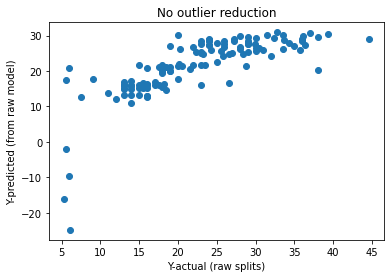

In [7]:
# Complete code below this comment  (Question #E005)
# ----------------------------------

plt.scatter(y_test, naive_predictions)
plt.title("No outlier reduction")
plt.xlabel("Y-actual (raw splits)")
plt.ylabel("Y-predicted (from raw model)")
plt.show()

### Using a model of your choice, remove outliers from X and y.

Import your tools for outlier reduction.  
Options include: `KMeans`, `EllipticEnvelope`, `IsolationForest`, and `OneClassSVM`. 

In [8]:
# Complete code below this comment  (Question #E006)
# ----------------------------------
from sklearn.ensemble import IsolationForest


Create training/test set with the removal of outliers from the above training/test set. 

In [9]:
# Complete code below this comment  (Question #E007)
# ----------------------------------

iso_forest = IsolationForest(contamination=0.05).fit(X_train, y_train)

iso_outliers = iso_forest.predict(X_train)==-1
print(f"Num of outliers = {np.sum(iso_outliers)}")
X_iso = X_train[~iso_outliers]
y_iso = y_train[~iso_outliers]


Num of outliers = 15


Fit a new model against inliers and print score (R^2) for the model.

In [14]:
# Complete code below this comment  (Question #E008)
# ----------------------------------

X_train_iso, X_test_iso, y_train_iso, y_test_iso = train_test_split(X_iso, y_iso, test_size=0.2)

iso_model = LinearRegression()
iso_model.fit(X_iso, y_iso)


r2_score(y_test, iso_predictions)

-0.006893260676753554

In [11]:
iso_scores = cross_val_score(estimator=iso_model, 
                             X=X_iso, y=y_iso)
print(iso_scores)
print("Mean CV score w/ IsolationForest:", np.mean(iso_scores))

[0.60502464 0.65288359 0.63678829 0.61969555 0.67646873]
Mean CV score w/ IsolationForest: 0.638172161694757


Predict with the test set, report R^2, and plot y-actual against y-predicted again for labels in testing set.

In [12]:
# Complete code below this comment  (Question #E009)
# ----------------------------------

iso_predictions = iso_model.predict(X_test)

r2_score(y_test, iso_predictions)

-0.006893260676753554

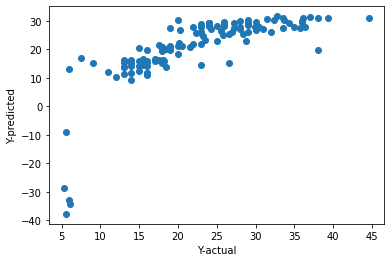

In [13]:
plt.scatter(y_test, iso_predictions)
plt.xlabel("Y-actual")
plt.ylabel("Y-predicted")
plt.show()

Pickle (serialize) your model as the file named: `my_module_4_model.pkl`

In [15]:
# Complete code below this comment  (Question #E010)
# ----------------------------------

import pickle

filename = 'my_module_4_model.pkl'

outfile = open(filename,'wb')

pickle.dump(iso_predictions,outfile)

outfile.close()


# Save your notebook!